In [1]:
pip install fastai --upgrade

     |████████████████████████████████| 189 kB 13.2 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
import fastai
from fastai.vision.all import *

In [3]:
!pip install -q jmd_imagescraper

In [4]:
from jmd_imagescraper.core import *
from pathlib import Path

In [5]:
path = Path.cwd()/"test_images"

In [6]:
if path.exists() :
  import shutil
  shutil.rmtree(path)

In [13]:
! unzip "/content/luca-martial fastai-v1-projects master mask-wear-storage_masks.zip"

Archive:  /content/luca-martial fastai-v1-projects master mask-wear-storage_masks.zip
   creating: proper/
 extracting: proper/proper66.jpg     
 extracting: proper/proper5.jpg      
   creating: improper/
 extracting: improper/improper16.jpg  
 extracting: improper/improper10.jpg  
 extracting: proper/proper19.jpeg    
 extracting: proper/proper70.jpeg    
 extracting: proper/proper51.jpeg    
 extracting: improper/improper1.jpg  
 extracting: improper/improper17.jpg  
 extracting: improper/improper15.jpg  
 extracting: improper/improper21.png  
 extracting: improper/improper14.jpeg  
 extracting: proper/proper43.png     
 extracting: proper/proper36.jpg     
 extracting: proper/proper3.jpg      
 extracting: proper/proper29.jpg     
 extracting: proper/proper14.jpg     
 extracting: proper/proper25.jpeg    
 extracting: proper/proper53.jpeg    
 extracting: proper/proper37.jpg     
 extracting: improper/improper20.jpg  
 extracting: proper/proper47.jpg     
 extracting: proper/proper

In [8]:
Path.cwd()/"proper/"

Path('/content/proper')

In [14]:
shutil.move("/content/improper", "/content/test_images1/")

'/content/test_images1/improper'

In [15]:
shutil.move("/content/proper", "/content/test_images1/")

'/content/test_images1/proper'

In [18]:
path = Path.cwd()/"test_images1"

In [19]:
path.ls()

(#2) [Path('/content/test_images1/improper'),Path('/content/test_images1/proper')]

In [20]:
covid = DataBlock(blocks = (ImageBlock, CategoryBlock),
                     get_items = get_image_files,
                     get_y = parent_label,
                     splitter = RandomSplitter(valid_pct = 0.2, seed = 40),
                     item_tfms = Resize(440),
                     batch_tfms = aug_transforms(size = 220, min_scale=0.8))

In [21]:
dls = covid.dataloaders(path, device = "cuda")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


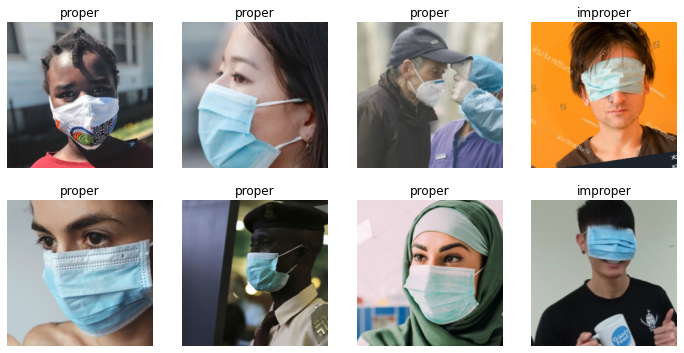

In [22]:
dls.show_batch(max_n = 8)

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = accuracy)

SuggestedLRs(valley=0.0008317637839354575)

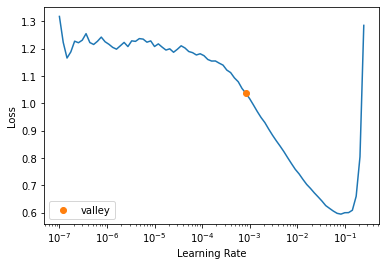

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(n_epoch = 10, lr_max=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.336672,1.216324,0.718750,00:05
1,0.970625,2.994549,0.625000,00:05
2,0.720350,3.844885,0.687500,00:04
3,0.573451,3.984316,0.718750,00:05
4,0.470578,3.435527,0.718750,00:04
5,0.414442,2.359542,0.718750,00:05
6,0.375116,1.815238,0.750000,00:05
7,0.332377,1.616326,0.750000,00:04
8,0.305969,1.492975,0.781250,00:05
9,0.282862,1.374366,0.843750,00:05


SuggestedLRs(valley=3.0199516913853586e-05)

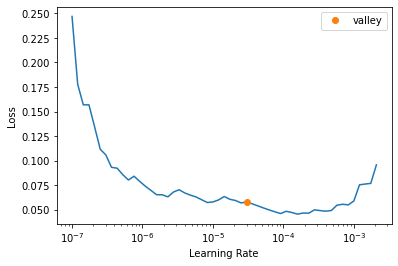

In [ ]:
learn.unfreeze()

learn.lr_find()

In [ ]:
learn.fit_one_cycle(n_epoch = 10, lr_max = 1e-4 )

epoch,train_loss,valid_loss,accuracy,time
0,0.023259,1.450686,0.781250,00:05
1,0.013248,1.965907,0.718750,00:05
2,0.029443,2.644214,0.718750,00:05
3,0.030412,2.583682,0.750000,00:05
4,0.024702,2.235914,0.750000,00:05
5,0.024737,1.459936,0.781250,00:05
6,0.028237,1.066167,0.906250,00:05
7,0.026616,1.044930,0.906250,00:05
8,0.027828,1.016189,0.875000,00:05
9,0.027121,0.991306,0.875000,00:05


In [ ]:
learn = cnn_learner(dls, resnet50, metrics = error_rate)

SuggestedLRs(valley=0.0005754399462603033)

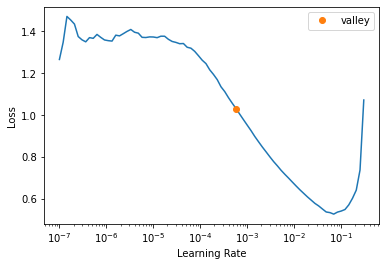

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(n_epoch = 10, lr_max =1e-2 )

epoch,train_loss,valid_loss,error_rate,time
0,1.334335,2.715098,0.406250,00:06
1,1.014971,1.807650,0.250000,00:06
2,0.770829,1.358470,0.156250,00:06
3,0.643559,0.883768,0.093750,00:06
4,0.535724,0.582692,0.093750,00:06
5,0.472068,0.333674,0.093750,00:06
6,0.404778,0.249874,0.093750,00:06
7,0.380550,0.313874,0.062500,00:06
8,0.340049,0.330578,0.062500,00:06
9,0.309908,0.326337,0.062500,00:06


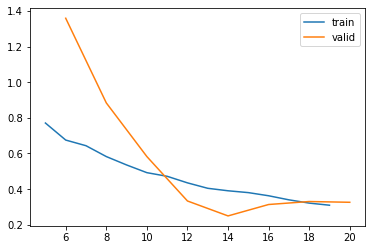

In [ ]:
learn.recorder.plot_loss()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

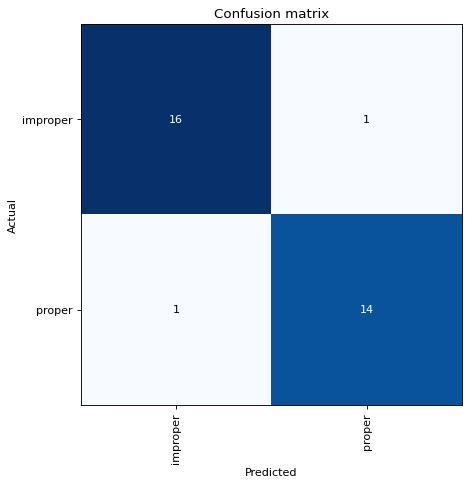

In [ ]:
interp.plot_confusion_matrix(figsize = (6,6), dpi = 80)

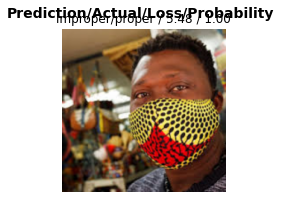

In [ ]:
interp.plot_top_losses(k = 1)

In [ ]:
pred = learn.predict("/content/download (1).jfif")

In [ ]:
pred

('improper', TensorBase(0), TensorBase([1.0000e+00, 9.9595e-11]))

In [ ]:
pred = learn.predict("/content/images.jfif")

In [ ]:
pred

('proper', TensorBase(1), TensorBase([0.0143, 0.9857]))

In [ ]:
learn.export("export.pkl")

In [ ]:
### important points
### 1. To find perfect learning rate, first use lr find to see where the lr starts increasing.
### 2. take that as max_lr
### 3. then use cyclic training to reduce the error . Till now we got 0.06 as the lowest error_rate.
### 4. In the next model , we will try to unfreeze the layers also and then check if we can decrease it even further . 

In [23]:
## Model 2

In [24]:
learn = cnn_learner(dls, resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0003981071640737355)

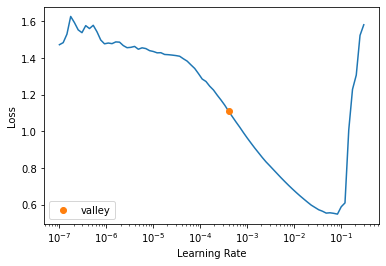

In [25]:
learn.lr_find()

In [26]:
learn.fit_one_cycle(n_epoch = 5, lr_max = 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.372566,0.670959,0.218750,00:09
1,0.979710,4.249599,0.281250,00:06
2,0.740010,1.793767,0.187500,00:06
3,0.565347,0.509792,0.125000,00:06
4,0.489686,0.557174,0.156250,00:06


In [27]:
learn.unfreeze()

SuggestedLRs(valley=4.365158383734524e-05)

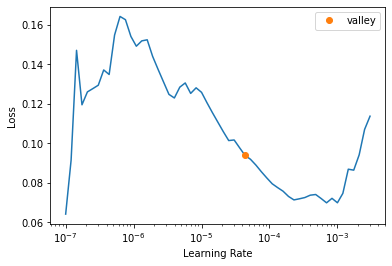

In [28]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(n_epoch = 10, lr_max = 1e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.142970,0.528736,0.125000,00:07
1,0.137035,0.555350,0.125000,00:07
2,0.117661,0.621056,0.093750,00:07
3,0.117654,0.741027,0.093750,00:07
4,0.099495,0.881021,0.093750,00:07
5,0.085575,0.856529,0.093750,00:07
6,0.075527,0.829284,0.093750,00:07
7,0.066365,0.807872,0.062500,00:06
8,0.064477,0.802616,0.062500,00:07
9,0.060475,0.807452,0.062500,00:06


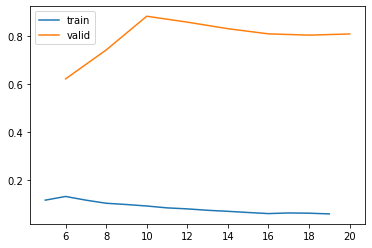

In [31]:
learn.recorder.plot_loss()

In [32]:
## Model 3 Here we will try to take different lrs for different layers

In [33]:
learn = cnn_learner(dls, resnet50, metrics = error_rate)

In [34]:
learn.fit_one_cycle(5, lr_max = 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.384914,1.381029,0.156250,00:06
1,1.111879,7.142897,0.312500,00:06
2,0.818799,2.226380,0.250000,00:06
3,0.634435,0.405173,0.093750,00:06
4,0.520136,0.283660,0.187500,00:06


In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(n_epoch = 10, lr_max = slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.094440,0.274303,0.125000,00:07
1,0.058868,0.358110,0.125000,00:07
2,0.073967,0.327357,0.125000,00:07
3,0.063389,0.301934,0.093750,00:07
4,0.057161,0.312680,0.093750,00:06
5,0.048573,0.321738,0.093750,00:07
6,0.052392,0.307081,0.062500,00:07
7,0.045693,0.304350,0.062500,00:07
8,0.041873,0.302683,0.062500,00:07
9,0.039068,0.305513,0.062500,00:07


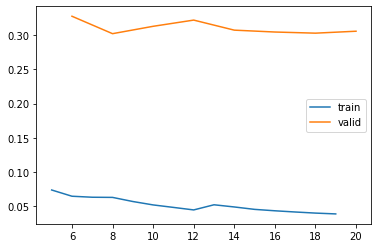

In [37]:
learn.recorder.plot_loss()

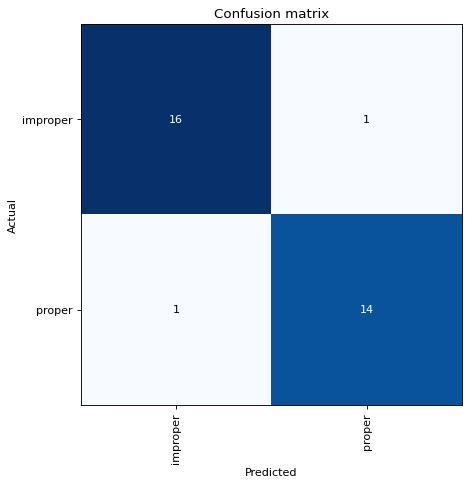

In [39]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize = (6,6), dpi = 80)

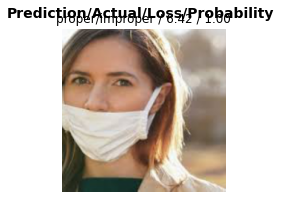

In [40]:
interp.plot_top_losses(1)

In [41]:
pred = learn.predict("/content/images.jfif")

In [42]:
pred

('improper', TensorBase(0), TensorBase([1.0000e+00, 2.9500e-06]))

In [43]:
img = Image.open("/content/images.jfif")

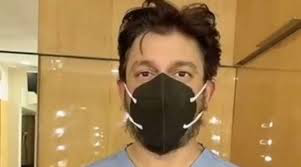

In [44]:
img

In [45]:
## So our best model has been the first one .